# **Decision Trees** #

- *Decision trees are one of the most strong classification and regression algorithm and the foundation of random forests.*

In [34]:
import numpy as numpy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [35]:
iris=load_iris()

In [36]:
X=iris['data'][:,2:]
y=iris['target']

In [37]:
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [38]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file=("iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

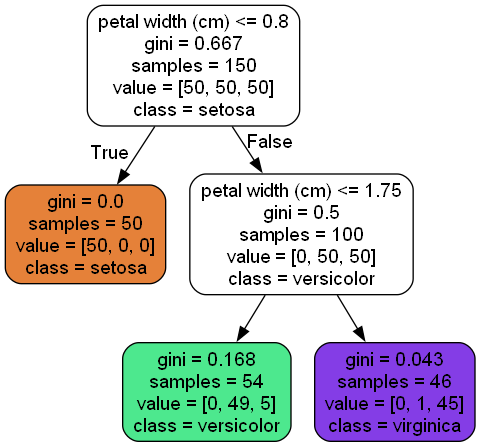

In [39]:
import pydot
from IPython.display import Image

# Path to the .dot file
dot_file_path = 'iris_tree.dot'
output_file_path = 'iris_tree.png'

# Read the .dot file and create a graph object
(graph,) = pydot.graph_from_dot_file(dot_file_path)

# Write the graph to a PNG file
graph.write_png(output_file_path)

# Display the image
Image(output_file_path)


In [40]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [41]:
tree_clf.predict([[5,1.5]])

array([1])

## **The CART algorithm** ##

- CART works on classification and regression principle. Initially it divides the training set into 2 subsets based on the feature k and threshhold tk . Both of these terms are selected based on the k and tk which make the purest subsets to reduce the cost function 

- J(k,tk)=(ml/m)Gl  + (mr/m)Gr
- Gl and Gr is impurity in both sides

# Excercise #

In [51]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

df=make_moons(n_samples=10000,noise=0.4)
X,y=df

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
from sklearn.model_selection import GridSearchCV
tuning_params={
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,15,20,25,30],
    'max_leaf_nodes':[None,10,15,16,17,18,19,20,21,22,23,24,25,30,40,50,60]
}
tree_clf=DecisionTreeClassifier()

grid_search=GridSearchCV(tree_clf,tuning_params,cv=5)
grid_search.fit(x_train,y_train)

best_parms=grid_search.best_params_
print("Best parameters for Decision Tree:", best_parms)

best_model = grid_search.best_estimator_
print("Best Decision Tree model:", best_model)

predictions=best_model.predict(x_test)

score=accuracy_score(y_test,predictions)
print("Accuracy of the best model:", score)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 30}
Best Decision Tree model: DecisionTreeClassifier(max_leaf_nodes=30)
Accuracy of the best model: 0.851
